Please note that this notebook is intended to be run in Google Colab rather than as a Jupyter notebook on your local machine. Please click the "Open in Colab" button.

## Setup

In [ ]:
#@title Install dependencies
!pip install chemprop
!pip install rdkit-pypi  # should be included in above after Chemprop v1.6 release

# Download test files from GitHub
!apt install subversion
!svn export https://github.com/chemprop/chemprop.git/trunk/tests/data

import chemprop
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

## Please upload your csv file containg retention time

- It should be named as```lc_traning.csv``` and ```lc_tobe_predicted.csv```
- The format is as below

- The first column should be the ```SMILES``` string of the small molecule that has already known for its retention time on your LC(HPLC) system

- ```0``` stands for at this specific range, the peak is not there, while ```1``` stands for it is there

- For example, if your peak comes out at 10.3min, then you should fill ```1``` in the range of ```10-15min```, all the other ranges should be ```0```

- If your solvent contains acid then under the ```acid``` title should be ```1```

```
smiles,normal,reverse,acid,base,0-1min,1-5min,5-10min,10-15min,15-20min,20-25min,25-30min,30-35min,35-40min,40-45min,45-50min,50-55min,55-60min
CCOc1ccc2nc(S(N)(=O)=O)sc2c1,0,0,1,,,0,0,1,0,0,0,0
CCN1C(=O)NC(c2ccccc2)C1=O,0,0,0,0,0,0,0,,0,,0,0
```

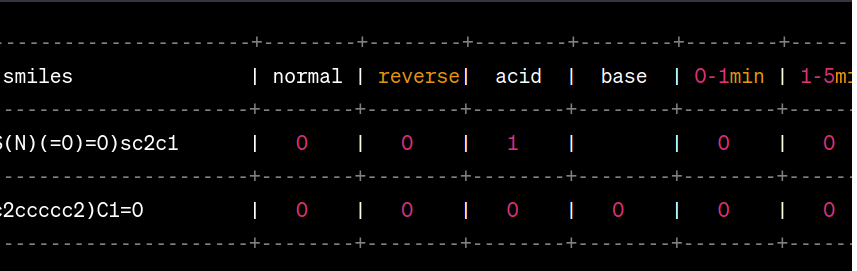

## CSV format normalisation
- There is an extra column in example CSV file called ID, the code below is to drop it to make sure the first column is the SMILES
- Modify the code below if your CSV file contain some special columns, for this example you can click directly without any issue.

In [4]:
#import pandas as pd
#df = pd.read_csv('/***.csv').drop('ID', axis=1)
#df.to_csv('/***_processed.csv', index=False)

## Training
- The default parameters are defined in offical chemprop site, like the default training epoch is 30 etc. You can modify if necessary.
- At the end of training, you would get something like
```
Model 0 test auc = 0.932412
Ensemble test auc = 0.932412
1-fold cross validation
	Seed 0 ==> test auc = 0.932412
Overall test auc = 0.932412 +/- 0.000000
Elapsed time = 0:09:25
```

In [ ]:
#https://chemprop.readthedocs.io/en/latest/tutorial.html#within-a-python-script
import chemprop

arguments = [
    '--data_path', './lc_training.csv',
    '--dataset_type', 'classification',
    '--save_dir', './'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

## Prediction

## CSV file format normalisation
- Similar idea to what have done to training files, here we need to make sure the fist column is SMILES


In [6]:
#df = pd.read_csv('/***.csv').drop('ID', axis=1)
#df.to_csv('/***_processed.csv', index=False)

## Predict for the retention time of new molecules
- A new CSV file called test_nolabel_predicted.csv will be created, with predicted calssification lables.

In [ ]:
import chemprop

arguments = [
    '--test_path', './lc_tobe_predicted.csv',
    '--preds_path', './lc_predicted.csv',
    '--checkpoint_dir', '/'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

## Print predictions

- By default the label is the probability of being calssification of 1

- Modify the code if you want output 0 or 1 instead

In [ ]:
df = pd.read_csv('./lc_predicted.csv')
df